# Quiz-2: Jove part

## General Notes

* **USE Jupyter notebook -- not Jupyter lab** -- for this quiz, because Jupyter widgets don't work correctly under the latter

* NOTE THAT since the quizzes are given to you each week and there are roughly 150 of you, we can't provide deep comments on your work. These Jove quizzes are mainly for your "self-study". If you have questions, please let us know through Canvas or during office hours.

* VERY IMPORTANT: If a cell's numbering "In [ ]" remains stuck as follows
```
In [*]
```
It means that this cell is infinitely looping. Remove the infinite loop if you can. If you can't debug the situation, contact us via Canvas, sending us the Jupyter (Jove) notebook.


## Goals of Quiz-2

* Learn about language operations
* Read lots of Jove code 
* RUN and then READ ALL THE CODE IN THIS NOTEBOOK)!! We won't test you on all your reading, but still, reading is to your advantage
* Watch two videos, one on languages and another on DFA
* Learn how to extend these Jove modules
* Learn how to define and test DFA



## How to answer

* Each section starting with "QN: " is a question. An answer is expected under that section.
* Run various commands and observe the results.  
  __Wherever I have placed the string #--answer-- , an answer is expected in either a code cell or a markdown cell, placed below the #--answer-- string.__  




# Video on Alphabet, Languages, etc.

__Unfortunately the recording volume was not high. Please wear a head-set__

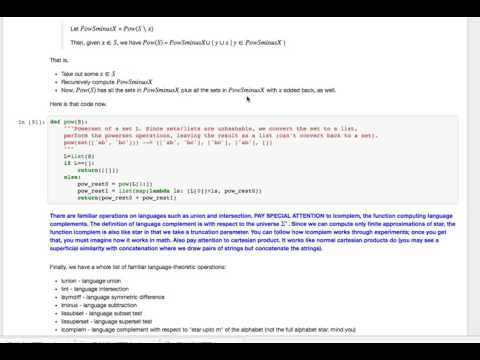

In [2]:
# This video corresponds to the Jupyter file
# Module2_LanguageOps.ipynb that you can find under "notebook/driver"
# of the Jove github

from IPython.display import YouTubeVideo
YouTubeVideo('TAEYvJn5eGc')

# QN: Provide a summary of the above video  

Under the "#--answer--" line  -- just 5 bullets of one sentence each. Just pick out some highlights of Jove. There is no "best answer". A reasonable effort is what we are looking for.

#--answer-- 
* Language is a set of sequences (strings) of symbols.
* lphi() returns the zero language. 
* L<sup>0</sup> should return the Unit Language
* lstar() uses a bound to be able to compute a star language
* There's a lot functions that help with powersets, lunions, intersections, ect.

# Code to define language operations


We first define the zero or phi or empty language

In [3]:
# The theory of languages : Primitive languages and language builders

def lphi():
    """In : None.
       Out: Zero language, i.e. set({}).
    """
    return set({})  # {} could be dict; so we put set(..)

Now let us define the Unit language ("1" for languages with respect to concatenation viewed as multiplication).

Let us also define language concatenation.

> $L1 \; L2 \;\; =\;\;  \{x y \; \mid \; x\in L1 \;\wedge\; y\in L2\}$

In [4]:
def lunit():
    """In : None.
       Out: {""} (a language : a set).
    """
    return {""} # Set with epsilon

def lcat(L1,L2):
    """In : L1 (language : a set),
            L2 (language : a set).
       Out: L1 concat L2 (language : a set).
       Example:
       L1 = {'ab', 'bc'} 
       L2 = {'11', 'ab', '22'} 
       lcat(L1,L2) -> {'abab', 'bc22', 'ab11', 'ab22', 'bcab', 'bc11'}
    """
    return {x+y for x in L1 for y in L2}

Examples of language operations

In [5]:
L = {'a','bc'}

print( "lcat(lphi(), L) = ",  lcat(lphi(), L) )
 
print( "lcat(lunit(), L) = ",  lcat(lunit(), L)  )



lcat(lphi(), L) =  set()
lcat(lunit(), L) =  {'bc', 'a'}


Let us define another language through set comprehension, and exercise many different applications of concatenation.


* Consider the language

 > M = $\{ 0^m 1^n \; \mid \; 0 \leq m,n \leq 3 \;\wedge\; m < n \}$

In [6]:
M = {"0"*m + "1"*n for m in range(3) for n in range(4) if m < n }
print(M)
print("lcat(L,M) = ", lcat(L,M))
print("lcat(M,lphi()) = ", lcat(M,lphi()))
print("lcat(M,lunit()) = ", lcat(M,lunit()))




{'0111', '1', '011', '00111', '111', '11'}
lcat(L,M) =  {'bc1', 'bc11', 'bc011', 'bc00111', 'bc0111', 'a11', 'bc111', 'a00111', 'a1', 'a0111', 'a111', 'a011'}
lcat(M,lphi()) =  set()
lcat(M,lunit()) =  {'0111', '1', '011', '00111', '111', '11'}


# QN: Show that you understand how lcat works

#--answer--

* lcat(M,lunit()) == {'1', '11', '00111', '111', '0111', '011'} because: 
lcat is finding something similiar to the cartesian product between M and the unit language and since any language concatened with the unit language just returns the first language, then we just get back M.


With concatenation and Unit under our belt, we can define exponentiation recursively. Exponentiation is repeated multiplication (which for us is concatenation).

> $L^n = L L^{n-1}$

> $L^0 = Unit$

We must have $L^0 = lunit()$; that is the only logical choice. 
(If you defined $L^0 = lphi()$, bad things will happen! Know what those bad things are!!)

The code below simulates the aforesaid recursion.

In [7]:
def lexp(L,n):
    """In : L (language : a set),
            n (exponent : a nat).
       Out: L^n (language : a set).
       Example:
       L = {'ab', 'bc'}
       n = 2
       lexp(A,2) -> {'abab', 'bcab', 'bcbc', 'abbc'}
    """
    return lunit() if n == 0 else lcat(L, lexp(L, n-1))

In [8]:
L = {'a','bc'}

M = {"0"*m + "1"*n for m in range(3) for n in range(4) if m < n }
print('M = ', M)
print('lexp(M,2) = ')
sorted(lexp(M,2), key= lambda l: len(l))

M =  {'0111', '1', '011', '00111', '111', '11'}
lexp(M,2) = 


['11',
 '111',
 '0111',
 '1111',
 '1011',
 '11011',
 '11111',
 '10111',
 '01111',
 '111111',
 '100111',
 '110111',
 '001111',
 '011111',
 '011011',
 '111011',
 '1110111',
 '0011111',
 '0111011',
 '1100111',
 '0110111',
 '0111111',
 '00111111',
 '01100111',
 '11100111',
 '01110111',
 '00111011',
 '001110111',
 '011100111',
 '0011100111']

In [9]:
L = {'a','bc'}
M = {"0"*m + "1"*n for m in range(3) for n in range(4) if m < n }
sorted(lexp(lcat(L,M),1), key= lambda l: len(l))

['a1',
 'bc1',
 'a11',
 'bc11',
 'a111',
 'a011',
 'bc011',
 'bc111',
 'a0111',
 'bc0111',
 'a00111',
 'bc00111']

With lexp under our belt, we can define lunion and lstar. We will define "star up to n" and then set n to infinity.

> $L^{*n} = L^n \; \cup \; L^{*(n-1)}$

> $L^{*0} = Unit$

And thus the classical $L^* = L^{*n}\;\; {\rm for}\;\; n=\infty$, which we won't bother to "run" in Python :-).  We will only run $L^{*n}$ in Python.

We also take care to test that lstar works correctly for lphi and Unit.

In [10]:
def lunion(L1,L2):
    """In : L1 (language : a set),
            L2 (language : a set).
       Out: L1 union L2 (language : a set).
    """
    return L1 | L2

def lstar(L,n):
    """In : L (language : a set),
            n (bound for lstar : a nat). 
       Out: L*_n (language : a set)
    Example:
    L = {'ab','bc'}
    n = 2
    lstar(L,2) -> {'abab', 'bcbc', 'ab', 'abbc', '', 'bc', 'bcab'}
    """
    return lunit() if n == 0 else lunion(lexp(L,n), lstar(L,n-1))

# QN: Recursive Definitions

In the code so far, we have lstar recursively defined in terms of lexp, and lexp defined recursively in terms of lcat. What are the basis cases in these recursive definitions?

(under the "#--answer--" line  -- just 2 bullets of one sentence each

#--answer-- 
* Basis case for lstar: We check 'if n == 0: return lunit()'  to see whether we concatened the n langugages and then we return unit language as the last one
* Basis case for lexp:  We check 'if n == 0: return lunit()'  to see whether we concatened the langugage n times with itself and then we return unit language

In [11]:
L1 = {'a','bc'}
lstar(L1,2) 

L2 = {'ab','bc'}
lstar(L2,2) 

L2 = {'ab','bc'}
lstar(L2,3)



{'',
 'ab',
 'abab',
 'ababab',
 'ababbc',
 'abbc',
 'abbcab',
 'abbcbc',
 'bc',
 'bcab',
 'bcabab',
 'bcabbc',
 'bcbc',
 'bcbcab',
 'bcbcbc'}

# RUN ALL CODE IN THIS NOTEBOOK USING JUPYTER NOTEBOOK

Jupyter lab does not like Jupyter widgets. So even if the code ran so far under jupyter lab, switch to Jupyter notebooks and rerun.


# Interactive depiction of star using widgets

Run the code below and show that you can make menu selections to pull-down select L1 and L2.

In [12]:
import ipywidgets as wdg
L1 = {'a','bc'}
L2 = {'ab','bc'}
M =  {'011', '111', '11', '0111', '00111', '1'}

wdg.interact(lstar,
L={'L1': L1, 'L2':L2, 'M': M, 'lphi': lphi(), 'lunit' : lunit()}, n=(0,7))

import ipywidgets as wdg
L1 = {'a','bc'}
L2 = {'ab','bc'}

# L3 = ...define L3 here...

M =  {'011', '111', '11', '0111', '00111', '1'}

wdg.interact(lstar,
L={ # Add the case for'L3': L3,  ..here..
   'L1': L1, 'L2':L2, 'M': M, 'lphi': lphi(), 'lunit' : lunit()}, n=(0,7))



<function __main__.lstar>

# QN: The star of lunit and lphi

Argue that the code for the star of lunit() and lphi() is correct. Write one sentence answer.

#--answer--

* lunit()'s star appears correct because: This is the same as multiplying 1 by 1 an infinite amount of times, you will always get 1 back. 
* lphi()'s star appears correct because: By convention we decided that L<sup>0</sup> will return the unit language and since we are computing the star of a language, we are simple computuing the union of an infinite unit languages.

# QN: Show that you can extend the Jove code

You are required to modify the code in Section ``*Interactive depiction of star using widgets*''

Copy the entire code to the cell below ("copy here" below) and make these changes:

1) In the code

```
wdg.interact
```

add another menu item by adding
```
'L3': L3 
```

Make sure you have defined 
```
L3 = {'0','1','2'}

```
right underneath L2's definition.

Then show by running the cell below and show that you can obtain the lstar of L3 at size 6.

That is, run 
```
lstar(L3, 6)
```
by using the menu selection.

#--answer--- 
Your answer will be in the next code cell, below.

# QN: Copy Here

In [33]:
# YOUR CODE COPIED FROM ABOVE AND MODIFLED!
# When this cell is run, you must be able to select L3 and produce lstar(L3, 6)

# Your code copy-pasted and modified should be below this line.

#--answer--
import ipywidgets as wdg
L1 = {'a','bc'}
L2 = {'ab','bc'}

L3 = {'0','1','2'}

M =  {'011', '111', '11', '0111', '00111', '1'}

wdg.interact(lstar,
L={ 'L3': L3,
   'L1': L1, 'L2':L2, 'M': M, 'lphi': lphi(), 'lunit' : lunit()}, n=(6,6))


<function __main__.lstar>

# QN: My L3's star appears correct

#--answer--

Write one sentence here saying why your definition of L3's star appears correct

* My definition of L3's star appears correct because: It appears correct because it is bounded by length 6 and the words contain only symbols from the alphabet L3.

Reversal and homomorphism now

In [14]:
# In Python, there isn't direct support for reversing a string.
# The backward selection method implemented by S[::-1] is what 
# many recommend. This leaves the start and stride empty, and
# specifies the direction to be going backwards. 
# Another method is "".join(reversed(s)) to reverse s

def srev(S):
    """In : S (string)
       Out: reverse of S (string)
       Example:
       srev('ab') -> 'ba'
    """
    return S[::-1] 

def lrev(L):
    """In : L (language : a set)
       Out: reverse of L (language : a set)
       Example: 
       lrev({'ab', 'bc'}) -> {'cb', 'ba'}
    """
    return set(map(lambda x: srev(x), L))

def shomo(S,f):
    """In : S (string)
            f (fun
            ction from char to char)
       Out: String homomorphism of S wrt f.
       Example: 
       S = "abcd"
       f = lambda x: chr( (ord(x)+1) % 256 )
       shomo("abcd",f) -> 'bcde'  
    """
    return "".join(map(f,S))

def lhomo(L,f):
    """In : L (language : set of strings)
            f (function from char to char)
       Out: Lang. homomorphism of L wrt f (language : set of str)
       Example:
       L = {"Hello there", "a", "A"}
       f = rot13 = lambda x: chr( (ord(x)+13) % 256 )
       lhomo(L, rot13) -> {'N', 'Uryy|-\x81ur\x7fr', 'n'}
    """
    return set(map(lambda S: shomo(S,f), L))

In [15]:
L={'ab', '007'}

# modulo-rotate all chars by one.
rot1 = lambda x: chr( (ord(x)+1) % 256 ) 

# Don't be baffled if the sets print in a different order!               
# Sets don't have a required positional presentation order
# Watch for the CONTENTS of the set reversing !!
print('lrev(L) = ', lrev(L)) 

print('lhomo(L, rot1) = ', lhomo(L, rot1))

print('lrev(lhomo(L), rot1) = ', lrev(lhomo(L, rot1)))


lrev(L) =  {'ba', '700'}
lhomo(L, rot1) =  {'bc', '118'}
lrev(lhomo(L), rot1) =  {'811', 'cb'}


# QN: The answer is correct

* Argue why the following assertion is true:  


```
lrev(lhomo(L), rot1) ==  {'811', 'cb'}
```

* This method is applying a homomorphism that in this case is just increasing the ascii value of the letter by one for every letter in every word of the language and in the end is reversing all the words, so if we start with 'ab' we get 'bc' then 'cb' while with '007' we get '118' then '811'.


# Let us now introduce powersets


We now define the powerset of a set S. We work with lists, as sets cannot contain other sets (not hashable, etc). But barring all that, here is the recursive definition being used.

> Let $PowSminusX$ = $powset(S \setminus x)$

> Then, given $x \in S$, we have $powset(S)$ = $PowSminusX  \cup$  { $y\cup x$  $\mid$ $y\in PowSminusX$ } 

That is,

* Take out some $x\in S$

* Recursively compute $PowSminusX$

* Now, $powset(S)$ has all the sets in $PowSminusX$ plus all the sets in $PowSminusX$ with $x$ added back, as well.

Here is that code now.

__Below, in a new markdown cell, write a clear description in about 3 sentences of how the
 mathematical definition above is captured in the code below.
 Ideal answer: Call out the above three bullets and under each of the
above bullets, write the code line that realizes these bullets.__



* Take out some $x\in S$
   
   pow_rest0 = powset(L[1:])
   
* Recursively compute $PowSminusX$

    -pow_rest1 = list(map(lambda Ls: [L[0]] + Ls, pow_rest0))

* Now, $powset(S)$ has all the sets in $PowSminusX$ plus all the sets in $PowSminusX$ with $x$ added back, as well.

    return(pow_rest0 + pow_rest1)

In [34]:
def powset(S):
    """In : S (set)
       Out: List of lists representing powerset.
            Since sets/lists are unhashable, we convert the set 
            to a list,perform the powerset operations, leaving 
            the result as a list (can't convert back to a set).
       Example:
       S = {'ab', 'bc'}
       powset(S) -> [['ab', 'bc'], ['bc'], ['ab'], []]
    """
    L=list(S)
    if L==[]:
        return([[]])
    else:
        pow_rest0 = powset(L[1:])
        pow_rest1 = list(map(lambda Ls: [L[0]] + Ls, pow_rest0))
        return(pow_rest0 + pow_rest1)

# QN: Testing powset

Below, explain the results produced briefly.
#--answer--

* powset of {a,b,c} appears to be correct, because: It contains all the possible subsets of the {a,b,c} set.

In [17]:
powset({'a','b','c'})



[[], ['c'], ['a'], ['a', 'c'], ['b'], ['b', 'c'], ['b', 'a'], ['b', 'a', 'c']]


# Finally, we have a whole list of familiar language-theoretic operations:

* lunion - language union

* lint - language intersection

* lsymdiff - language symmetric difference

* lminus - language subtraction

* lissubset - language subset test

* lissuperset - language superset test

* lcomplem - language complement with respect to "star upto m" of the alphabet (not the full alphabet star, mind you)

* product - cartesian product

We do not provide too many tests for these rather familiar functions. But please make sure you understand language complements well!


In [36]:
# Define lunion (as before)
def lunion(L1,L2):
    """In : L1 (language : set of strings)
            L2 (language : set of strings)
       Out: L1 union L2 (sets of strings)
    """
    return L1 | L2

def lint(L1,L2):
    """In : L1 (language : set of strings)
            L2 (language : set of strings)
       Out: L1 intersection L2 (sets of strings)
    """
    return L1 & L2

def lsymdiff(L1,L2):
    """In : L1 (language : set of strings)
            L2 (language : set of strings)
       Out: (L1 \ L2) union (L2 \ L1) (sets of strings)
       Example:
       lsymdiff({'ab', 'bc'}, {'11', 'ab', '22'}) -> {'11', '22', 'bc'}
    """
    return L1 ^ L2

def lminus(L1,L2):
    """Language subtraction of two languages (sets of strings)
       Can do it as L1.difference(L2) also. 
    """
    return L1 - L2

def lissubset(L1,L2):
    """In : L1 (language : set of strings)
            L2 (language : set of strings)
       Out: L1 is subset or equal to L2 (True/False)
    """
    return L1 <= L2

def lissuperset(L1,L2):
    """In : L1 (language : set of strings)
            L2 (language : set of strings)
       Out: L1 is superset or equal to L2 (True/False)
    """
    return L1 >= L2
    
def lcomplem(L,sigma,n):
    """In : L (language : set of strings)
            sigma (alphabet : set of strings)
            n (finite limit for lstar : int)
       Out : sigma*_n - L (language : set of strings)
       Example:
       L = {'0', '10', '010'}
       sigma = {'0', '1'}
       n = 3
       lcomplem(L4,{'0','1'}, 3) -> 
       {'', '000', '101', '011', '00', '1', 
        '001', '110', '111', '100', '01', '11'}
    """
    return lstar(sigma,n) - L  

def product(S1,S2):
    """In : S1 (set)
            S2 (set)
       Out: Cartesian product of S1 and S2 (set of pairs)
    """
    return { (x,y) for x in S1 for y in S2 }

#--end

In [19]:
L1 = {'0101'}
L2 = lstar({'0','1'}, 2)
# Python variable L2L1 denotes concat of L2 and L1
L2L1 = lcat(L2,L1) 
L2L1

L3 = lcat(L1, lunion(lunit(), L2L1))
L3


{'0101',
 '0101000101',
 '010100101',
 '01010101',
 '0101010101',
 '0101100101',
 '010110101',
 '0101110101'}

# QN: Show you can define the symmetric difference of two sets in Jove without using "^"

## The code for lsymdiff is written above using Python's
```
^
```
operator. Show that you don''t need to use this operator (you can define it using lminus, lunion, etc.)

Call this new function new_lsymmdiff.

Test it as follows:
```
new_lsymmdiff(lstar({'0','1'}, 2), lstar({'0','1'}, 3))
```

## Your answer code is in the next code cell below

#--answer---

In [47]:
# Write your new_lsymmdiff code here and test it in this very cell on the above test
# ...code...
def new_lsymmdiff(L1, L2):
    return lunion(lminus(L1, L2), lminus(L2,L1))

new_lsymmdiff(lstar({'0','1'}, 2), lstar({'0','1'}, 3))

{'000', '001', '010', '011', '100', '101', '110', '111'}

In [48]:
lsymdiff(lstar({'0','1'}, 2), lstar({'0','1'}, 3))

{'000', '001', '010', '011', '100', '101', '110', '111'}

# Numeric Order

In [21]:
from math import floor, log, pow
def nthnumeric(N, Sigma={'a','b'}):
    """Assume Sigma is a 2-sized list/set of chars (default {'a','b'}). 
       Produce the Nth string in numeric order, where N >= 0.
       Idea : Given N, get b = floor(log_2(N+1)) - need that 
       many places; what to fill in the places is the binary 
       code for N - (2^b - 1) with 0 as Sigma[0] and 1 as Sigma[1].    
    """
    if (type(Sigma)==set):
       S = list(Sigma)
    else:
       assert(type(Sigma)==list
       ), "Expected to be given set/list for arg2 of nthnumeric."
       S = Sigma
    assert(len(Sigma)==2
          ),"Expected to be given a Sigma of length 2."
    if(N==0):
        return ''
    else:
        width = floor(log(N+1, 2))
        tofill = int(N - pow(2, width) + 1)
        relevant_binstr = bin(tofill)[2::] # strip the 0b 
                                           # in the leading string
        len_to_makeup = width - len(relevant_binstr)
        return (S[0]*len_to_makeup + 
                shomo(relevant_binstr,
                      lambda x: S[1] if x=='1' else S[0]))

# Testing Numeric Order

In [22]:
nthnumeric(7,['0','1'])


'000'

# QN: Justify that the above answer is correct
#--answer--

* nthnumeric(7, ['0', '1']) produces '000' because: If we enumerate based by length we have: '', 0, 1, 00, 01, 10, 11, 000,..., so 000 is the element in index 7.


In [23]:
# This is an excellent recipe for generating test inputs to machines

tests = [ nthnumeric(i, ['0','1']) for i in range(18) ]
for inp in tests:
    print("Test input =", inp)
    
# Below, explain the results produced briefly.
#--answer--    

Test input = 
Test input = 0
Test input = 1
Test input = 00
Test input = 01
Test input = 10
Test input = 11
Test input = 000
Test input = 001
Test input = 010
Test input = 011
Test input = 100
Test input = 101
Test input = 110
Test input = 111
Test input = 0000
Test input = 0001
Test input = 0010


# Introducing DFA

The video below corresponds to Drive_DFA_Unit1.ipynb that is found
in the "notebooks/driver" link of the Jove github

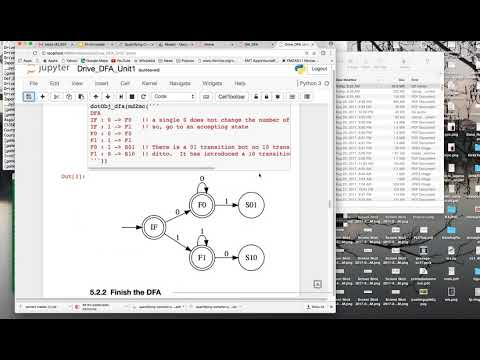

In [24]:
# This Youtube video walks through this notebook
# Watch and enjoy. No specific work yet.
# You can put in 2x speed and quickly watch, slowing down when
# interesting parts come!

from IPython.display import YouTubeVideo
YouTubeVideo('Bdr926TeQyQ')

# Basics of DFA

This unit is going to introduce you to the basics of Deterministic Finite Automata and Regular Languages.

We have recorded a Youtube video that will explain this notebook plus a few related things! This will serve as material for Lecture 4 and perhaps also later lectures.

 ## Regular languages

Regular languages are one family (or set) of languages. (Both words "family" and "set" mean the same.)

A regular language is specified by drawing a DFA. Once you finish drawing a DFA, you would have defined a regular language. (We will soon tell you why you might want to take the trouble of drawing DFA and obtain regular languages. For now, we will finish defining terms.)  

Ultimately the aim is to not produce drawings. We aim to define a simple type of machine that represents goto based programs. we shall define the notion of a transition system and introduce a simple text-based markdown language that helps specify transition systems. Once the transition system is defined, a drawing can be automatically produced using utilities we provide. However we shall continue to say "draw a DFA" to mean "specify a transition system."

## There are an infinite number of DFAs that can denote the same regular language

Much like 1+1 and 3-1 both denote number 2, and there are an infinite number of arithmetic expressions that denote 2, there are an infinite number of transition systems that denote the same regular language. But usually we don't write 364-362 in order to convey "2" (e.g., you seldom order (364-362) pancakes in a restaurant.) The same way, you try to specify the simplest possible DFA to denote a particular regular language -- not an artificially bloated one.

However, with numbers, we know that "2" is simpler than (364-362). With DFA, don't worry: even if you did not draw the simplest DFA, there is an automated tool that we shall give you that creates the simplest DFA. Yes, there is a unique simplest DFA called the minimal DFA for each regular language.

## There are an infinite number of regular languages

Much like there are an infinite number of natural numbers, there are also an infinite number of regular languages. So let us get the two ideas of infinity introduced so far straight:

* Each natural number can be written in an infinite number of variants. E.g., 1 = 2-1 = 3-2 = 4-3 = ...
    - Similarly, each regular language can be denoted by an infinite number of DFA
  
  
* There are an infinite number of natural numbers, e.g., 0,1,2, ...
    - Similarly, there are an infinite number of regular languages


# JFLAP: a tool for interactive study of DFA

I will be introducing JFLAP in class. Please take notes then.

# Using Jove for DFA

We shall be using Jove's markdown notation to specify DFA.  



In [25]:
from jove.DotBashers import *
from jove.Def_md2mc import *
from jove.Def_DFA   import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)



# Now we begin our work building DFA.

As we go along, we will also be teaching you how to "think DFA" so that you can code them up "straight from your head"


## Jove's markdown

Jove's markdown is designed to cover four machine types:

1. DFA
2. NFA
3. PDA
4. TM
 
There are only these four basic machine types one studies in most automata theory courses.

## Markdown syntax for DFA

The markdown syntax for DFA is quite simple. To understand what we are about to say below, kindly refer to Def_DFA.ipynb and un

Given that a DFA consists of a set of states, an initial state, a possibly empty set of final states, and a transition function, we want to have an arrangement by which we require the user to specify the least and infer everything else.

Thus we settle on a notation that specifies the transition function. We will add a few details that allows us to infer the initial and final states. Specifically, to describe a DFA:

* Specify a state with name beginning with I that will be the initial state (lower-case i is OK too)

* If the DFA in question has an initial state that is also a final state, let the state name begin with IF (lowercase if is OK)

* For final states, use a name that begins with F or f

* Then just specify-away transitions. 

### Example DFA

We will now specify the DFA whose language is the set of strings that have the same number of 01 and 10 transitions. We will specify the transitions below in markdown within triple quotes initially, and then present the same in a code cell.

We decide to include $\varepsilon$ as well as single occurrences of $0$ and $1$. These strings all trivially contain an equal number of 01 and 10 transitions.

Let us design this DFA bit by bit, this being our first example. We will show the final result under "putting it all together," below.

#### Initial state and the first few moves

We begin in state IF, meaning that it is initial and final. This is how we admit $\varepsilon$ into the machine's language. Now from IF, upon 0 or upon 1, we must still go to a final state, as the machine must accept a $0$ or a $1$ because a single $0$ or $1$ has an equal number of $01$ and $10$ changes -- meaning $0$ such!

We can even plot these partial DFA as we move along. Just don't run them -- that is all! 

** NOTE ** : When you present your solutions, present only the final product, and not every intermediate DFA

Generating LALR tables


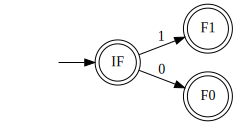

In [26]:
dotObj_dfa(md2mc('''
DFA
IF : 0 -> F0  !! a single 0 does not change the number of 01 or 10 transitions
IF : 1 -> F1  !! so, go to an accepting state
'''))

#### Fully decode at every state, transitioning to appropriate states 

We now fill all other moves, decoding upon a 0 or a 1 at every state, keeping the overall semantics in mind.

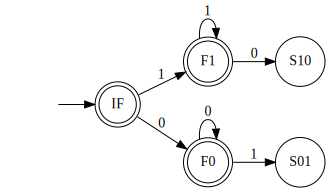

In [27]:
# Pick up from before, adding more lines to the DFA description
dotObj_dfa(md2mc('''
DFA
IF : 0 -> F0   !! a single 0 does not change the number of 01 or 10 transitions
IF : 1 -> F1   !! so, go to an accepting state
F0 : 0 -> F0
F1 : 1 -> F1
F0 : 1 -> S01  !! There is a 01 transition but no 10 transition. So go to non-accepting state
F1 : 0 -> S10  !! ditto.  It has introduced a 10 transition without a  01 transition
'''))

### Finish the DFA

Now that we have made incremental progress and have our thoughts flowing, let's go ahead and
finish the DFA. Plus we also name the DFA object and hold onto it, and then also plot wrt that name.
See the details below.

In [28]:
# Pick up from before, adding more lines to the DFA description
EqChangeDFA = md2mc('''
DFA
!!--
IF : 0 -> F0   !! a single 0 does not change the number of 01 or 10 transitions
IF : 1 -> F1   !! so, go to an accepting state
F0 : 0 -> F0
F1 : 1 -> F1
F0 : 1 -> S01  !! There is a 01 transition but no 10 transition. So go to non-accepting state
F1 : 0 -> S10  !! ditto.  It has introduced a 10 transition without a  01 transition
S01: 1 -> S01  !! Remain in S01 as the 01 vs 10 balance has not been restored
S10: 0 -> S10  !! Similar reasoning as above
S01: 0 -> F0   !! Balance restored now!
S10: 1 -> F1   !! Balance restored now!
!!--- 
!! this finishes the construction, as we have accounted for all transitions
''')

In [29]:
# Let us view the internal Python representation of 
# DFA as an n-tuple (Q, Sigma, Delta, q0, F)
EqChangeDFA

{'Delta': {('F0', '0'): 'F0',
  ('F0', '1'): 'S01',
  ('F1', '0'): 'S10',
  ('F1', '1'): 'F1',
  ('IF', '0'): 'F0',
  ('IF', '1'): 'F1',
  ('S01', '0'): 'F0',
  ('S01', '1'): 'S01',
  ('S10', '0'): 'S10',
  ('S10', '1'): 'F1'},
 'F': {'F0', 'F1', 'IF'},
 'Q': {'F0', 'F1', 'IF', 'S01', 'S10'},
 'Sigma': {'0', '1'},
 'q0': 'IF'}

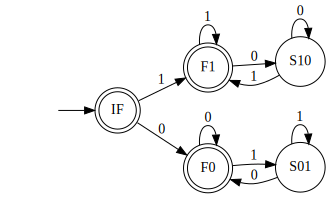

In [30]:
# Now let us view the DFA as a graph
dotObj_dfa(EqChangeDFA)

### Running a constructed DFA

We run a DFA by generating a collection of strings and generating the status of run (feeding it to accepts_dfa)
The full language of the DFA is infinitary, and so we won't present all of it (obviously) but only enough of it
to believe that we have built the correct DFA. Later we can check properties and conclude that the machine has
all the required moves.

In [31]:
from math import floor, log, pow
def nthnumeric(N, Sigma={'a','b'}):
    """Assume Sigma is a 2-sized list/set of chars (default {'a','b'}). 
       Produce the Nth string in numeric order, where N >= 0.
       Idea : Given N, get b = floor(log_2(N+1)) - need that 
       many places; what to fill in the places is the binary 
       code for N - (2^b - 1) with 0 as Sigma[0] and 1 as Sigma[1].    
    """
    if (type(Sigma)==set):
       S = list(Sigma)
    else:
       assert(type(Sigma)==list
       ), "Expected to be given set/list for arg2 of nthnumeric."
       S = Sigma
    assert(len(Sigma)==2
          ),"Expected to be given a Sigma of length 2."
    if(N==0):
        return ''
    else:
        width = floor(log(N+1, 2))
        tofill = int(N - pow(2, width) + 1)
        relevant_binstr = bin(tofill)[2::] # strip the 0b 
                                           # in the leading string
        len_to_makeup = width - len(relevant_binstr)
        return (S[0]*len_to_makeup + 
                shomo(relevant_binstr,
                      lambda x: S[1] if x=='1' else S[0]))

In [32]:
tests = [ nthnumeric(i, ['0','1']) for i in range(19) ]
for t in tests:
    if accepts_dfa(EqChangeDFA, t):
        print("This DFA accepts ", t)
    else:
        print("This DFA rejects ", t)

This DFA accepts  
This DFA accepts  0
This DFA accepts  1
This DFA accepts  00
This DFA rejects  01
This DFA rejects  10
This DFA accepts  11
This DFA accepts  000
This DFA rejects  001
This DFA accepts  010
This DFA rejects  011
This DFA rejects  100
This DFA accepts  101
This DFA rejects  110
This DFA accepts  111
This DFA accepts  0000
This DFA rejects  0001
This DFA accepts  0010
This DFA rejects  0011


# QN: Answer in six sentences

Write a paragraph of about 6 sentences (6 bullets) on how Jove helped you define a DFA and test it using the function nthnumeric.

#--answer--

* The DFA was created using Jove's markdown. A state that is initial and final begins with: IF
* A state that is only final begins with: F
* Function nthnumeric gives you a good way to test DFA exhaustively upto a size, because: It generates different inputs that are ordered by length.
  - If the alphabet size is above 2, then nthnumeric, as implemented in Jove, is not very
    helpful for testing because: It basically will reach the assertion line that checks the size of the alphabet and then it will fail and exit. 
  - Then I can test using lstar(L,n) for some value of n, because, unlike nthnumeric,
    lstar can take alphabets of size... : larger than 2.
* Comments in Jove's markdown must begin with: DFA
* The function to draw a DFA is <<this one>> : dotObj_dfa
* Overall, the DFA was entered piece by piece, each time producing a drawing for the partially finished piece. In the above example, we drew this many partial DFAs before finally finishing it: 3

END of Quiz2